# Fashion Company

Una empresa produce seis productos en el siguiente
moda. Cada unidad de materia prima comprada rinde cuatro
unidades del producto 1, dos unidades del producto 2 y una unidad de
producto 3. Se pueden vender hasta 1.200 unidades del producto 1, y
Se pueden vender hasta 300 unidades del producto 2. Cada unidad de
El producto 1 se puede vender o procesar más. Cada unidad de
El producto 1 que se procesa produce una unidad del producto 4.
La demanda de los productos 3 y 4 es ilimitada. Cada unidad de
El producto 2 se puede vender o procesar más. Cada unidad de
el producto 2 que se procesa adicionalmente produce 0,8 unidades de producto
5 y 0,3 unidades de producto 6. Hasta 1.000 unidades de producto 5
Se pueden vender y se pueden vender hasta 800 unidades del producto 6.
Se pueden comprar hasta 3.000 unidades de materia prima a 6 dólares la unidad.
unidad. Las unidades sobrantes de los productos 5 y 6 deben destruirse.
Cuesta $\$ 4$ destruir cada unidad sobrante del producto 5 y $\$ 3$ destruir cada unidad sobrante del producto 6. Ignorar el crudo
costos de compra de materiales, el precio de venta por unidad y
Los costos de producción para cada producto se muestran en la Tabla 24.
Formule un PL cuya solución produzca un programa de producción que maximice las ganancias.

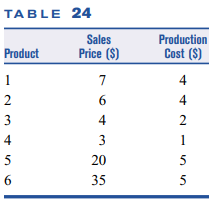

#Conjuntos

$ i = \text{Productos indexados por } i$

$ j = \text{Productos con desperdicio indexados por } j$

## Variables de decisión

$ x_{i} = \textrm{cantidad de producto } i$

$ y_{2} = \textrm{cantidad de producto 2 que va para el producto 5 y 6 } $

$ c_{j} = \textrm{productos que tienen desperdicio } i$

$ r = \textrm{Cantidad de materia prima }$

## Función Objetivo

$$ \textrm{Max } z= 7x_{1} + 6x_{2} + 4x_{3}+3x_{4}+20x_{5}+35x_{6} - 4x_{1} - 4x_{2} - 2x_{3} - x_{4} - 5(x_{5} + c_{5}) - 5(x_{6} + c_{6}) - 4c_{5} - 3c_{6}$$

## Restricciones

Se posee una cantidad de producto por la materia prima para el producto 1 y para el producto 4,

$$ x_{1} + x_{4} = 4r $$

Se posee una cantidad de producto por la materia prima para el producto 2, 5 y 6,

$$ x_{2} + y_{2} = 2r$$

Se posee una cantidad de producto por la materia prima para el producto 3,

$$ x_{3} = r $$

Sólo se pueden vender 1200 unidades de producto 1,

$$ x_{1} \leq 1200 $$

Sólo se pueden vender 300 unidades de producto 2,

$$ x_{2} \leq 300 $$

Sólo se pueden vender 1000 unidades de producto 5,

$$ x_{5} \leq 1000 $$

Sólo se pueden vender 800 unidades de producto 6,

$$ x_{6} \leq 800 $$

Hay una cantidad producida y una desperdiciada del producto 5,

$$ x_{5} + c_{5} = 0.8y_{2} $$

Hay una cantidad producida y una desperdiciada del producto 6,

$$ x_{6} + c_{6} = 0.3y_{2} $$




In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 33.7 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [4]:
# Crear la instancia del modelo
model = LpProblem(name="Fashion_Company", sense=LpMaximize)

X1 = LpVariable('X1', 0, None, LpContinuous)
X2 = LpVariable('X2', 0, None, LpContinuous)
X3 = LpVariable('X3', 0, None, LpContinuous)
X4 = LpVariable('X4', 0, None, LpContinuous)
X5 = LpVariable('X5', 0, None, LpContinuous)
X6 = LpVariable('X6', 0, None, LpContinuous)
Y2 = LpVariable('Y2', 0, None, LpContinuous)
C5 = LpVariable('C5', 0, None, LpContinuous)
C6 = LpVariable('C6', 0, None, LpContinuous)
R = LpVariable('R', 0, None, LpContinuous)

# Agregar la función objetivo
model += 7 * X1 + 6 * X2 + 4 * X3 + 3 * X4 + 20 * X5 + 35 * X6 - 4 * X1 - 4 * X2 - 2 * X3 - X4 - 5 * (X5 + C5) - 5 * (X6 + C6) - 4 * C5 - 3 * C6

# Agregar las restricciones
model += X1 + X4 == 4 * R
model += X2 + Y2 == 2 * R
model += X3 == R
model += X1 <= 1200
model += X2 <= 300
model += X5 <= 1000
model += X6 <= 800
model += X5 + C5 == 0.8 * Y2
model += X6 + C6 == 0.3 * Y2

# Resolver el modelo
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Utilidades totales = $", value(model.objective))

Status: Optimal
C5 = 1133.3333
C6 = 0.0
R = 1483.3333
X1 = 1200.0
X2 = 300.0
X3 = 1483.3333
X4 = 4733.3333
X5 = 1000.0
X6 = 800.0
Y2 = 2666.6667
Utilidades totales = $ 45433.3335
